In [8]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rich import print as pprint
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import auc

from truthful_counterfactuals.utils import EXPERIMENTS_PATH
from truthful_counterfactuals.utils import latex_table, render_latex
from truthful_counterfactuals.metrics import threshold_error_reduction

plt.style.use("default")

In [9]:
PATH = os.getcwd()

NUM_BINS = 50

RESULTS_PATH = os.path.join(EXPERIMENTS_PATH, 'results')
RESULTS_FILE = 'results.json'

In [21]:
result_map = {
    'mve_iid': {
        'model': 'GATv2',
        'method': 'MVE',
        'ood': 'iid',
        'paths': [
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_gat_cal_1'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_gat_cal_2'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_gat_cal_3'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_gat_cal_4'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_gat_cal_5'),
        ]  
    },
    'ens_iid': {
        'model': 'GATv2',
        'method': 'ENS(3)',
        'ood': 'iid',
        'paths': [
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_gat_cal_1'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_gat_cal_2'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_gat_cal_3'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_gat_cal_4'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_gat_cal_5'),
        ]
    },
    'ens_mve_iid': {
        'model': 'GATv2',
        'method': 'ENS(3)+MVE',
        'ood': 'iid',
        'paths': [
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_gat_cal_1'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_gat_cal_2'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_gat_cal_3'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_gat_cal_4'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_gat_cal_5'),
        ] 
    },
    # == Structure-OOD ==
    'mve_ood_struct': {
        'model': 'GATv2',
        'method': 'MVE',
        'ood': 'struct',
        'paths': [
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_ood_struct_1'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_ood_struct_2'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_ood_struct_3'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_ood_struct_4'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_ood_struct_5'),
        ]
    },
    'ens_ood_struct': {
        'model': 'GATv2',
        'method': 'ENS(3)',
        'ood': 'struct',
        'paths': [
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_ood_struct_1'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_ood_struct_2'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_ood_struct_3'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_ood_struct_4'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_ood_struct_5'),
        ]
    },
    'ens_mve_ood_struct': {
        'model': 'GATv2',
        'method': 'ENS(3)+MVE',
        'ood': 'struct',
        'paths': [
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_ood_struct_1'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_ood_struct_2'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_ood_struct_3'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_ood_struct_4'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_ood_struct_5'),
        ]
    },
    # 'swag_ood_struct': {
    #     'model': 'GATv2',
    #     'method': 'SWA',
    #     'ood': 'struct',
    #     'paths': [
    #         os.path.join(RESULTS_PATH, 'quantify_uncertainty__swag', 'logp_ood_struct_1'),
    #         os.path.join(RESULTS_PATH, 'quantify_uncertainty__swag', 'logp_ood_struct_2'),
    #         os.path.join(RESULTS_PATH, 'quantify_uncertainty__swag', 'logp_ood_struct_3'),
    #         os.path.join(RESULTS_PATH, 'quantify_uncertainty__swag', 'logp_ood_struct_4'),
    #         os.path.join(RESULTS_PATH, 'quantify_uncertainty__swag', 'logp_ood_struct_5'),
    #     ]
    # },
    # == Value-OOD ==
    'mve_ood_value': {
        'model': 'GATv2',
        'method': 'MVE',
        'ood': 'value',
        'paths': [
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_ood_value_1'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_ood_value_2'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_ood_value_3'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_ood_value_4'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__mve', 'logp_ood_value_5'),
        ]
    },
    'ens_ood_value': {
        'model': 'GATv2',
        'method': 'ENS(3)',
        'ood': 'value',
        'paths': [
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_ood_value_1'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_ood_value_2'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_ood_value_3'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_ood_value_4'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens', 'logp_ood_value_5'),
        ]
    },
    'ens_mve_ood_value': {
        'model': 'GATv2',
        'method': 'ENS(3)+MVE',
        'ood': 'value',
        'paths': [
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_ood_value_1'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_ood_value_2'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_ood_value_3'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_ood_value_4'),
            os.path.join(RESULTS_PATH, 'quantify_uncertainty__ens_mve', 'logp_ood_value_5'),
        ]
    },
    # 'swag_ood_value': {
    #     'model': 'GATv2',
    #     'method': 'SWA',
    #     'ood': 'value',
    #     'paths': [
    #         os.path.join(RESULTS_PATH, 'quantify_uncertainty__swag', 'logp_ood_value_1'),
    #         os.path.join(RESULTS_PATH, 'quantify_uncertainty__swag', 'logp_ood_value_2'),
    #         os.path.join(RESULTS_PATH, 'quantify_uncertainty__swag', 'logp_ood_value_3'),
    #         os.path.join(RESULTS_PATH, 'quantify_uncertainty__swag', 'logp_ood_value_4'),
    #         os.path.join(RESULTS_PATH, 'quantify_uncertainty__swag', 'logp_ood_value_5'),
    #     ]
    # },
}

def get_value(value: float | list):
    if isinstance(value, list):
        return value[0]
    return value

In [22]:
print('processing the results...')
for key, data in result_map.items():
    
    data['mae_values'] = []
    data['r2_values'] = []
    data['corr_values'] = []
    data['auc_mean_values'] = []
    data['auc_max_values'] = []
    
    print(f' * processing {key}')
    for path in data['paths']:
        
        results_path = os.path.join(path, RESULTS_FILE)
        with open(results_path, mode='r') as file:
            content = file.read()
            results = json.loads(content)
            
        out_true = [get_value(result['graph_labels']) for result in results]
        out_pred = [get_value(result['prediction']) for result in results]
            
        # calculating the prediction performance metrics (MAE & R2)
        mae_value = mean_absolute_error(out_true, out_pred)
        r2_value = r2_score(out_true, out_pred)
        data['mae_values'].append(mae_value)
        data['r2_values'].append(r2_value)
        
        # as a setup we then have to calculate the error between the prediction and the true value
        # and also get the uncertainty values from the results directly
        for result in results:
            result['error'] = abs(get_value(result['graph_labels']) - get_value(result['prediction']))
        
        errors = np.array([get_value(result['error']) for result in results])
        uncertainties = np.array([get_value(result['uncertainty']) for result in results])
        
        # then we can calculate the correlation between the error and the uncertainty
        corr_value = np.corrcoef(errors, uncertainties)[0, 1]
        data['corr_values'].append(corr_value)
        
        # finally we can use the error and uncertainty values to calculate the EUT-AUC
        ths, rds = threshold_error_reduction(uncertainties, errors, error_func=np.mean, num_bins=NUM_BINS)
        auc_mean_value = auc(ths, rds)
        data['auc_mean_values'].append(auc_mean_value)
        
        ths, rds =  threshold_error_reduction(uncertainties, errors, error_func=np.max, num_bins=NUM_BINS)
        auc_max_value = auc(ths, rds)
        data['auc_max_values'].append(auc_max_value)
        
    pprint(data)

processing the results...
 * processing mve_iid


{
    'model': 'GATv2',
    'method': 'MVE',
    'ood': 'iid',
    'paths': [
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_gat_cal_1',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_gat_cal_2',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_gat_cal_3',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_gat_cal_4',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_gat_cal_5'
    ],
    'mae_values': [
        0.10569132759889963,
        0.17751715126876344,
        0.7834454482871659,
        0.6704280332547481,
        0.08461341529568683
    ],
    'r2_values': [
        0.9954790659501883,
        0.9917230476159811,
        0.8524983537123189,
        0.862153488160444,
        0.9901898573556899
    ],
    'corr_values': [
        0.5644940330262079,
        0.5384174780054235,
        0.625395441410859,
        0.7788230813176648,
        0.8543946692488021
    ],
    'auc_mean_values': [
        0.28863595330102493,
        0.1717721815311604,
        0.32801212434086136,
        0.326034895872122,
        0.387459595175255
    ],
    'auc_max_values': [
        0.84197755439577,
        0.554929763657625,
        0.5159484173687021,
        0.8291144334824515,
        0.9517949114672105
    ]
}

 * processing ens_iid


{
    'model': 'GATv2',
    'method': 'ENS(3)',
    'ood': 'iid',
    'paths': [
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_gat_cal_1',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_gat_cal_2',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_gat_cal_3',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_gat_cal_4',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_gat_cal_5'
    ],
    'mae_values': [
        0.08742114232441978,
        0.11953952734760452,
        0.0883939092523431,
        0.08104246322779877,
        0.08855863073952992
    ],
    'r2_values': [
        0.9979234860578983,
        0.9956697449259213,
        0.9979140670594936,
        0.9983034673213381,
        0.997770944880367
    ],
    'corr_values': [
        0.5262409022134348,
        0.4704025302204361,
        0.42395457531777536,
        0.48313613465517397,
        0.37866147265241423
    ],
    'auc_mean_values': [
        0.2062510817218008,
        0.22117205426908734,
        0.2374238337817074,
        0.16951118494528056,
        0.2384357102805932
    ],
    'auc_max_values': [
        0.7641825517064225,
        0.2593083806395907,
        0.5651657254811459,
        0.6759620461197411,
        0.2626091283057176
    ]
}

 * processing ens_mve_iid


{
    'model': 'GATv2',
    'method': 'ENS(3)+MVE',
    'ood': 'iid',
    'paths': [
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_gat_cal_1',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_gat_cal_2',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_gat_cal_3',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_gat_cal_4',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_gat_cal_5'
    ],
    'mae_values': [
        0.3769345907475507,
        0.658783883544674,
        0.23661861355476754,
        0.0959489247408293,
        0.12931695785838265
    ],
    'r2_values': [
        0.9477884599682938,
        0.8986170623774389,
        0.9850227749297439,
        0.9970886955924144,
        0.9938885795500448
    ],
    'corr_values': [
        0.7422183528592704,
        0.7319195907217888,
        0.6701917297958896,
        0.6843554910369802,
        0.6205588050369099
    ],
    'auc_mean_values': [
        0.29826837703888653,
        0.3370870906038899,
        0.23450344836640874,
        0.2808718329275624,
        0.32732301544277004
    ],
    'auc_max_values': [
        0.7097953494469227,
        0.7691603990759498,
        0.7762844812248094,
        0.7951953267424908,
        0.8168306922093359
    ]
}

 * processing mve_ood_struct


{
    'model': 'GATv2',
    'method': 'MVE',
    'ood': 'struct',
    'paths': [
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_ood_struct_1',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_ood_struct_2',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_ood_struct_3',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_ood_struct_4',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_ood_struct_5'
    ],
    'mae_values': [
        0.5902168095157704,
        0.2771818933618927,
        0.6153214004218373,
        0.16307008988372165,
        0.49456588960451775
    ],
    'r2_values': [
        0.9733843103972644,
        0.9922373523507676,
        0.9576668324531458,
        0.9979064192084688,
        0.980088932431255
    ],
    'corr_values': [
        0.6061425403796427,
        0.6251519420030964,
        0.7342132428636288,
        0.3850224732622597,
        0.4962725725800399
    ],
    'auc_mean_values': [
        0.18931061032150145,
        0.39341842013837414,
        0.26167102134492365,
        0.26377204328039255,
        0.24270507167387392
    ],
    'auc_max_values': [
        0.36362399530595996,
        0.6174366598007279,
        0.3951387812523077,
        0.5329734844109001,
        0.4735548411047134
    ]
}

 * processing ens_ood_struct


{
    'model': 'GATv2',
    'method': 'ENS(3)',
    'ood': 'struct',
    'paths': [
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_ood_struct_1',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_ood_struct_2',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_ood_struct_3',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_ood_struct_4',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_ood_struct_5'
    ],
    'mae_values': [
        0.1588099122102224,
        0.20813452327072404,
        0.17695483695190506,
        0.18087441578542165,
        0.14990368166859766
    ],
    'r2_values': [
        0.9975438395221919,
        0.9961227699982349,
        0.9969034219423379,
        0.9965474679536495,
        0.9976610894283324
    ],
    'corr_values': [
        0.3720971335819729,
        0.4381364961558079,
        0.5515506070316999,
        0.4842309361795614,
        0.34320890393409165
    ],
    'auc_mean_values': [
        0.2238619334205101,
        0.17621677657041923,
        0.24154702078624435,
        0.2320569687801633,
        0.17181060568509543
    ],
    'auc_max_values': [
        0.7125254036296332,
        0.6645065529966551,
        0.6603287611284496,
        0.707775002288295,
        0.7216351599854328
    ]
}

 * processing ens_mve_ood_struct


{
    'model': 'GATv2',
    'method': 'ENS(3)+MVE',
    'ood': 'struct',
    'paths': [
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_ood_struct_1',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_ood_struct_2',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_ood_struct_3',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_ood_struct_4',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_ood_struct_5'
    ],
    'mae_values': [
        0.6147715095986518,
        0.30761049236184057,
        0.47867173906350824,
        0.6103484247891569,
        0.43961371252258424
    ],
    'r2_values': [
        0.96918007906163,
        0.9921638990160373,
        0.9786269531260026,
        0.9574745117520812,
        0.9818419709824375
    ],
    'corr_values': [
        0.2797518713393453,
        0.6217556100937381,
        0.7368492611726023,
        0.835133848419376,
        0.5389975394827982
    ],
    'auc_mean_values': [
        0.1772180266352158,
        0.2582359582865616,
        0.34440789988452947,
        0.45737431705002485,
        0.21920713438834905
    ],
    'auc_max_values': [
        0.6167166077439997,
        0.7084125083513386,
        0.6974197892825463,
        0.7887513989946346,
        0.7323267694689315
    ]
}

 * processing mve_ood_value


{
    'model': 'GATv2',
    'method': 'MVE',
    'ood': 'value',
    'paths': [
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_ood_value_1',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_ood_value_2',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_ood_value_3',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_ood_value_4',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__mve/logp_ood_value_5'
    ],
    'mae_values': [
        0.4017276162236823,
        1.1927803464317184,
        0.4836835863362628,
        0.3299818830596174,
        1.2004620178938972
    ],
    'r2_values': [
        0.987439424910451,
        0.941335742677125,
        0.985368708433249,
        0.9922295738236153,
        0.9296272798111644
    ],
    'corr_values': [
        0.474356295927366,
        0.6691045442767805,
        0.47800182094272753,
        0.3547708304102943,
        0.7616400097084167
    ],
    'auc_mean_values': [
        0.46838797777848756,
        0.362859746377555,
        0.02358236368287331,
        0.46829661032568,
        0.46988152801274663
    ],
    'auc_max_values': [
        0.8510624165774873,
        0.5983779353553856,
        0.47431008992084467,
        0.7539020553800261,
        0.5645642572130136
    ]
}

 * processing ens_ood_value


{
    'model': 'GATv2',
    'method': 'ENS(3)',
    'ood': 'value',
    'paths': [
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_ood_value_1',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_ood_value_2',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_ood_value_3',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_ood_value_4',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens/logp_ood_value_5'
    ],
    'mae_values': [
        0.4875740943116305,
        0.5634904277251804,
        0.6302312628170282,
        0.2941107119603179,
        0.42505962898420724
    ],
    'r2_values': [
        0.9840670785501203,
        0.9809618310159356,
        0.9774520648819135,
        0.994353964844356,
        0.9874960460074239
    ],
    'corr_values': [
        0.5049835222565721,
        0.6696588134580841,
        0.6848783531745486,
        0.5043405596262731,
        0.5118490498149029
    ],
    'auc_mean_values': [
        0.3255602139268658,
        0.6401900207289067,
        0.6913059807024747,
        0.5858781790897973,
        0.7670794728974201
    ],
    'auc_max_values': [
        0.5939494028642598,
        0.8558384242808036,
        0.8396040482008847,
        0.667751561348745,
        0.843110544429852
    ]
}

 * processing ens_mve_ood_value


{
    'model': 'GATv2',
    'method': 'ENS(3)+MVE',
    'ood': 'value',
    'paths': [
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_ood_value_1',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_ood_value_2',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_ood_value_3',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_ood_value_4',
        '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_unce
rtainty__ens_mve/logp_ood_value_5'
    ],
    'mae_values': [
        0.5416857834837648,
        0.5394254795141812,
        0.48632759443360796,
        0.5013782588272416,
        0.5415616148738847
    ],
    'r2_values': [
        0.9808162583613833,
        0.9813572516383403,
        0.9868248260429584,
        0.9873538806974635,
        0.9828004325845758
    ],
    'corr_values': [
        0.5554898705979989,
        0.6698490933986165,
        0.6196009272793712,
        0.6240923556327411,
        0.569911197306228
    ],
    'auc_mean_values': [
        0.48727473976591196,
        0.6717227153639199,
        0.42855942907392186,
        0.5049504488379778,
        0.5574787154970298
    ],
    'auc_max_values': [
        0.7726348945080512,
        0.8322174236337156,
        0.6351853205693425,
        0.8207906965661946,
        0.7427432597439753
    ]
}

In [23]:
print('summarizing the results...')

rows = []
for key, data in result_map.items():
    row = [
        data['ood'],
        data['method'],
        data['r2_values'],
        data['corr_values'],
        data['auc_mean_values'],
        data['auc_max_values'],
    ]
    rows.append(row)

_, content = latex_table(
    column_names=['OOD', 'Method', r'$R^2$', r'$\rho$', r'$\text{UER-AUC}_{\text{mean}}$', r'$\text{UER-AUC}_{\text{max}}$'],
    rows=rows,
)
    
tex_path = os.path.join(PATH, 'table_ood.tex')
with open(tex_path, mode='w') as file:
    file.write(content)
    
pdf_path = os.path.join(PATH, 'table_ood.pdf')
render_latex({'content': content}, pdf_path)

summarizing the results...


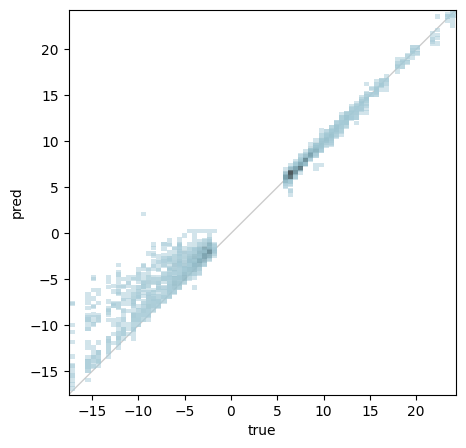

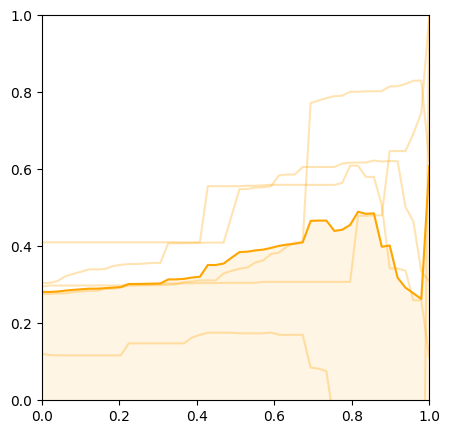

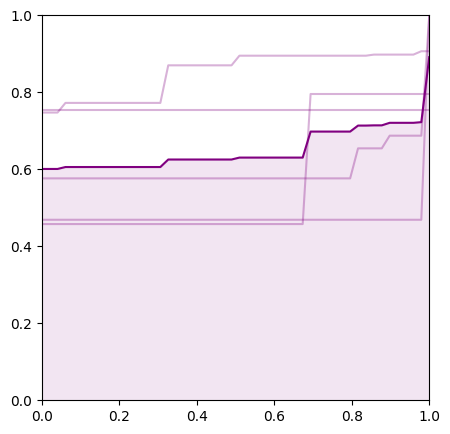

In [24]:
fig_dist, ax_dist = plt.subplots(ncols=1, nrows=1, figsize=(5, 5))
    
fig_mean, ax_mean = plt.subplots(ncols=1, nrows=1, figsize=(5, 5))
fig_max, ax_max = plt.subplots(ncols=1, nrows=1, figsize=(5, 5))

ths_mean = []
rds_mean = []

ths_max = []
rds_max = []
    
for path in result_map['mve_ood_value']['paths']:
    
    results_path = os.path.join(path, RESULTS_FILE)
    with open(results_path, mode='r') as file:
        content = file.read()
        results = json.loads(content)
        
    out_true = [get_value(result['graph_labels']) for result in results]
    out_pred = [get_value(result['prediction']) for result in results]
    
    for result in results:
            result['error'] = abs(get_value(result['graph_labels']) - get_value(result['prediction']))
    errors = np.array([get_value(result['error']) for result in results])
    uncertainties = np.array([get_value(result['uncertainty']) for result in results])
    
    df = pd.DataFrame({
        'true': out_true,
        'pred': out_pred,
        'errors': errors,
        'uncertainties': uncertainties,
    })
    sns.histplot(data=df, x='true', y='pred', ax=ax_dist, color='lightblue', alpha=0.5, bins=200)

    ths, rds = threshold_error_reduction(uncertainties, errors, error_func=np.mean, num_bins=NUM_BINS)
    ax_mean.plot(ths, rds, color='orange', alpha=0.3)
    ths_mean.append(ths)
    rds_mean.append(rds)
    
    ths, rds =  threshold_error_reduction(uncertainties, errors, error_func=np.max, num_bins=NUM_BINS)
    ax_max.plot(ths, rds, color='purple', alpha=0.3)
    ths_max.append(ths)
    rds_max.append(rds)

val_min = np.percentile(out_true, 1)
val_max = np.percentile(out_true, 99)

ax_dist.set_ylim([val_min, val_max])
ax_dist.set_xlim([val_min, val_max])

ax_dist.plot([val_min, val_max], [val_min, val_max], color='black', linestyle='-', linewidth=1, alpha=0.2, zorder=-10)

ax_mean.set_ylim([0, 1])
ax_mean.set_xlim([0, 1])

ax_max.set_ylim([0, 1])
ax_max.set_xlim([0, 1])

ths_mean = np.mean(ths_mean, axis=0)
rds_mean = np.mean(rds_mean, axis=0)

ax_mean.plot(ths_mean, rds_mean, color='orange', alpha=1, label='mean')
ax_mean.fill_between(ths_mean, 0, rds_mean, color='orange', alpha=0.1)

ths_max = np.mean(ths_max, axis=0)
rds_max = np.mean(rds_max, axis=0)

ax_max.plot(ths_max, rds_max, color='purple', alpha=1, label='max')
ax_max.fill_between(ths_max, 0, rds_max, color='purple', alpha=0.1)